In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

## Loading Dataset

In [2]:
data = pd.read_csv("CLVֹֹ_Example.csv",encoding='ISO-8859-1')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


## Removing Duplicates

In [4]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

## Data Insights

<AxesSubplot:>

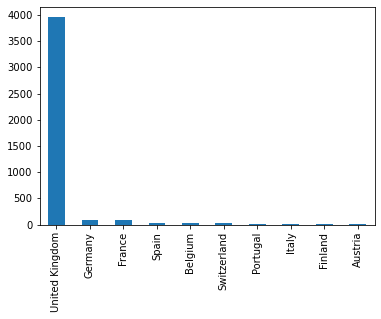

In [5]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [6]:
uk_data=data[data.Country=='United Kingdom']

In [7]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.0+ MB


In [8]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
uk_data = uk_data[(uk_data['Quantity']>0)]

In [10]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    486286 non-null  object 
 1   StockCode    486286 non-null  object 
 2   Description  485694 non-null  object 
 3   Quantity     486286 non-null  int64  
 4   InvoiceDate  486286 non-null  object 
 5   UnitPrice    486286 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      486286 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.4+ MB


## Filter required Columns

In [11]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [12]:
#Calulate total purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [13]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

('01/02/2011 08:23', '31/10/2011 17:13')

In [14]:
PRESENT = dt.datetime(2011,12,10)

In [15]:
uk_data['InvoiceDate1']=pd.to_datetime(uk_data['InvoiceDate'])
uk_data.drop(['InvoiceDate'], axis=1, inplace=True)
uk_data.rename(columns={"InvoiceDate1": "InvoiceDate"}, inplace=True)

In [16]:
uk_data.head()

,CustomerID,InvoiceNo,Quantity,UnitPrice,TotalPurchase,InvoiceDate
0,17850.0,536365,6,2.55,15.30,2010-01-12 08:26:00
1,17850.0,536365,6,3.39,20.34,2010-01-12 08:26:00
2,17850.0,536365,8,2.75,22.00,2010-01-12 08:26:00
3,17850.0,536365,6,3.39,20.34,2010-01-12 08:26:00
4,17850.0,536365,6,3.39,20.34,2010-01-12 08:26:00


# RFM Analysis

In [17]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (PRESENT - x.max()).days, # Recency
                                        'InvoiceNo': lambda x: len(x),      # Frequency
                                        'TotalPurchase': lambda x: x.sum()}) # Monetary Value

In [18]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPurchase'], dtype='object')

In [19]:
# Change the name of columns
rfm.columns=['recency','frequency','monetary']

In [20]:
rfm['recency'] = rfm['recency'].astype(int)

In [21]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,22,103,4196.01
12748.0,4,4596,33719.73
12749.0,22,199,4090.88
12820.0,44,59,942.34


# Computing Quantile of RFM values

In [22]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [23]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,22,103,4196.01,2,1,1
12748.0,4,4596,33719.73,1,1,1
12749.0,22,199,4090.88,2,1,1
12820.0,44,59,942.34,2,2,2


In [24]:
rfm['RFM_Score'] = (rfm.r_quartile.astype(str)+
rfm.f_quartile.astype(str) +
 rfm.m_quartile.astype(str))

In [25]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,22,103,4196.01,2,1,1,211
12748.0,4,4596,33719.73,1,1,1,111
12749.0,22,199,4090.88,2,1,1,211
12820.0,44,59,942.34,2,2,2,222


In [26]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,11,431,259657.30,1,1,1,111
17450.0,2,337,194550.79,1,1,1,111
17511.0,5,963,91062.38,1,1,1,111
16684.0,11,277,66653.56,1,1,1,111
14096.0,11,5111,65164.79,1,1,1,111
15311.0,-1,2379,60767.90,1,1,1,111
13089.0,5,1818,58825.83,1,1,1,111
15061.0,4,403,54534.14,1,1,1,111
14088.0,10,589,50491.81,1,1,1,111


In [27]:
rfm.to_csv('Customer_Segmentation.csv', index=False, encoding='utf-8')